## Graduate Admission From an Indian Perspective

##### Importing libraries

In [1]:
import pandas as pd 

##### Importing data

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


##### shape

In [4]:
df.shape

(500, 9)

##### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


we can see that all the features are numericals but actually the University Rating and research column are categorical so it should be object datatype we need to change it 

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df['University Rating'] = df['University Rating'].astype('O')
df['Research'] = df['Research'].astype('O')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    object 
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    object 
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.3+ KB


##### Numerical Features

In [9]:
numerical_feautures = df.select_dtypes(exclude = 'O')

In [10]:
print(list(numerical_feautures))

['Serial No.', 'GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']


##### Categorical features

In [11]:
categorical_features = df.select_dtypes(include = 'O')

In [12]:
print(list(categorical_features))

['University Rating', 'Research']


##### summary of Dataset

In [13]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,144.481833,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,125.750000,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,250.500000,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


##### Null Values

In [14]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##### Null Values in percentage

In [15]:
df.isnull().sum()/(len(df))*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [16]:
df.isnull().sum().sum()

0

No null values found

##### Duplicate values

In [17]:
df.duplicated().sum()

0

No duplicate values found

In [18]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

##### droping unwanted column

In [19]:
df.drop(['Serial No.'], axis = 1, inplace=True)

In [20]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


### Exploratory Data Analysis

In [21]:
df['Chance of Admit '].value_counts()

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit , Length: 61, dtype: int64

In [22]:
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 0 if x < 0.80 else 1)

In [23]:
df['Chance of Admit '].value_counts()

0    345
1    155
Name: Chance of Admit , dtype: int64

In [24]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

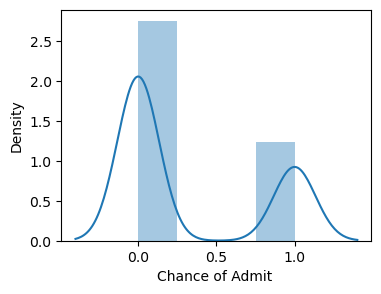

In [26]:
plt.figure(figsize=(4,3))
sns.distplot(df['Chance of Admit '])
plt.show()

In [27]:
df['TOEFL Score'].value_counts().head()

110    44
105    37
104    29
107    28
106    28
Name: TOEFL Score, dtype: int64

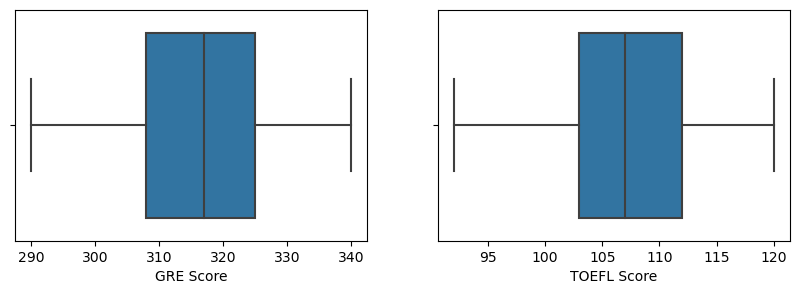

In [28]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(df['GRE Score'])

plt.subplot(1,2,2)
sns.boxplot(df['TOEFL Score'])
plt.show()

In [29]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [30]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=object)

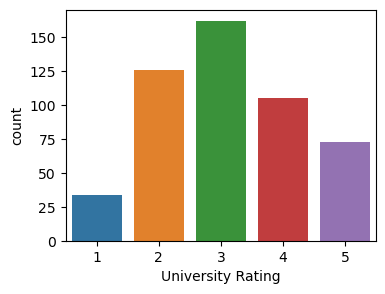

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(df['University Rating'])
plt.show()

In [32]:
df['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [33]:
df['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

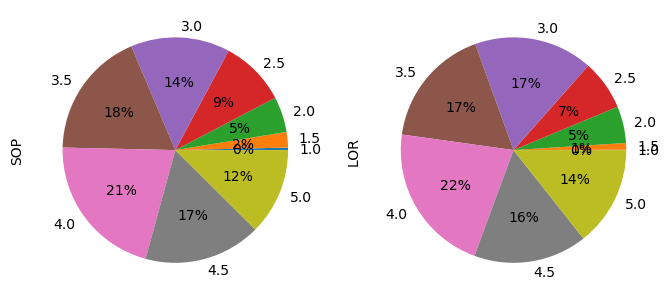

In [34]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df.groupby(df['SOP'])['SOP'].sum().plot(kind ='pie',autopct='%.0f%%')

plt.subplot(1,2,2)
df.groupby(df['LOR '])['LOR '].sum().plot(kind ='pie',autopct='%.0f%%')
plt.show()

In [35]:
df['CGPA'].value_counts().head()

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
Name: CGPA, dtype: int64

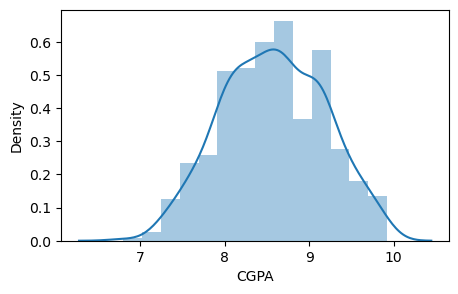

In [36]:
plt.figure(figsize=(5,3))
sns.distplot(df['CGPA'])
plt.show()

In [37]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

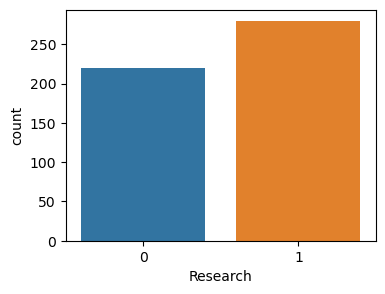

In [38]:
plt.figure(figsize=(4,3))
sns.countplot(df['Research'])
plt.show()

In [39]:
df.corr()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
GRE Score,1.000000,0.827200,0.613498,0.524679,0.825878,0.683633
TOEFL Score,0.827200,1.000000,0.644410,0.541563,0.810574,0.699101
SOP,0.613498,0.644410,1.000000,0.663707,0.712154,0.581077
LOR,0.524679,0.541563,0.663707,1.000000,0.637469,0.500391
CGPA,0.825878,0.810574,0.712154,0.637469,1.000000,0.742278
Chance of Admit,0.683633,0.699101,0.581077,0.500391,0.742278,1.000000


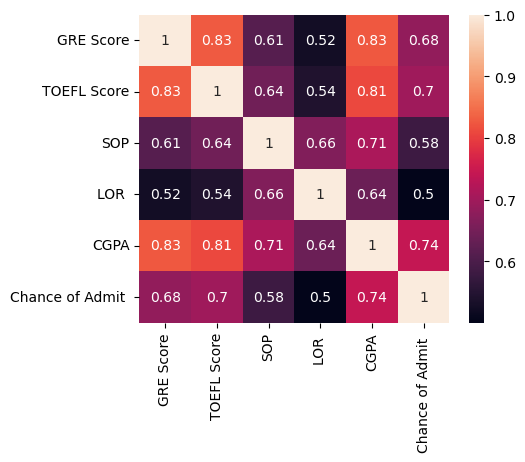

In [40]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

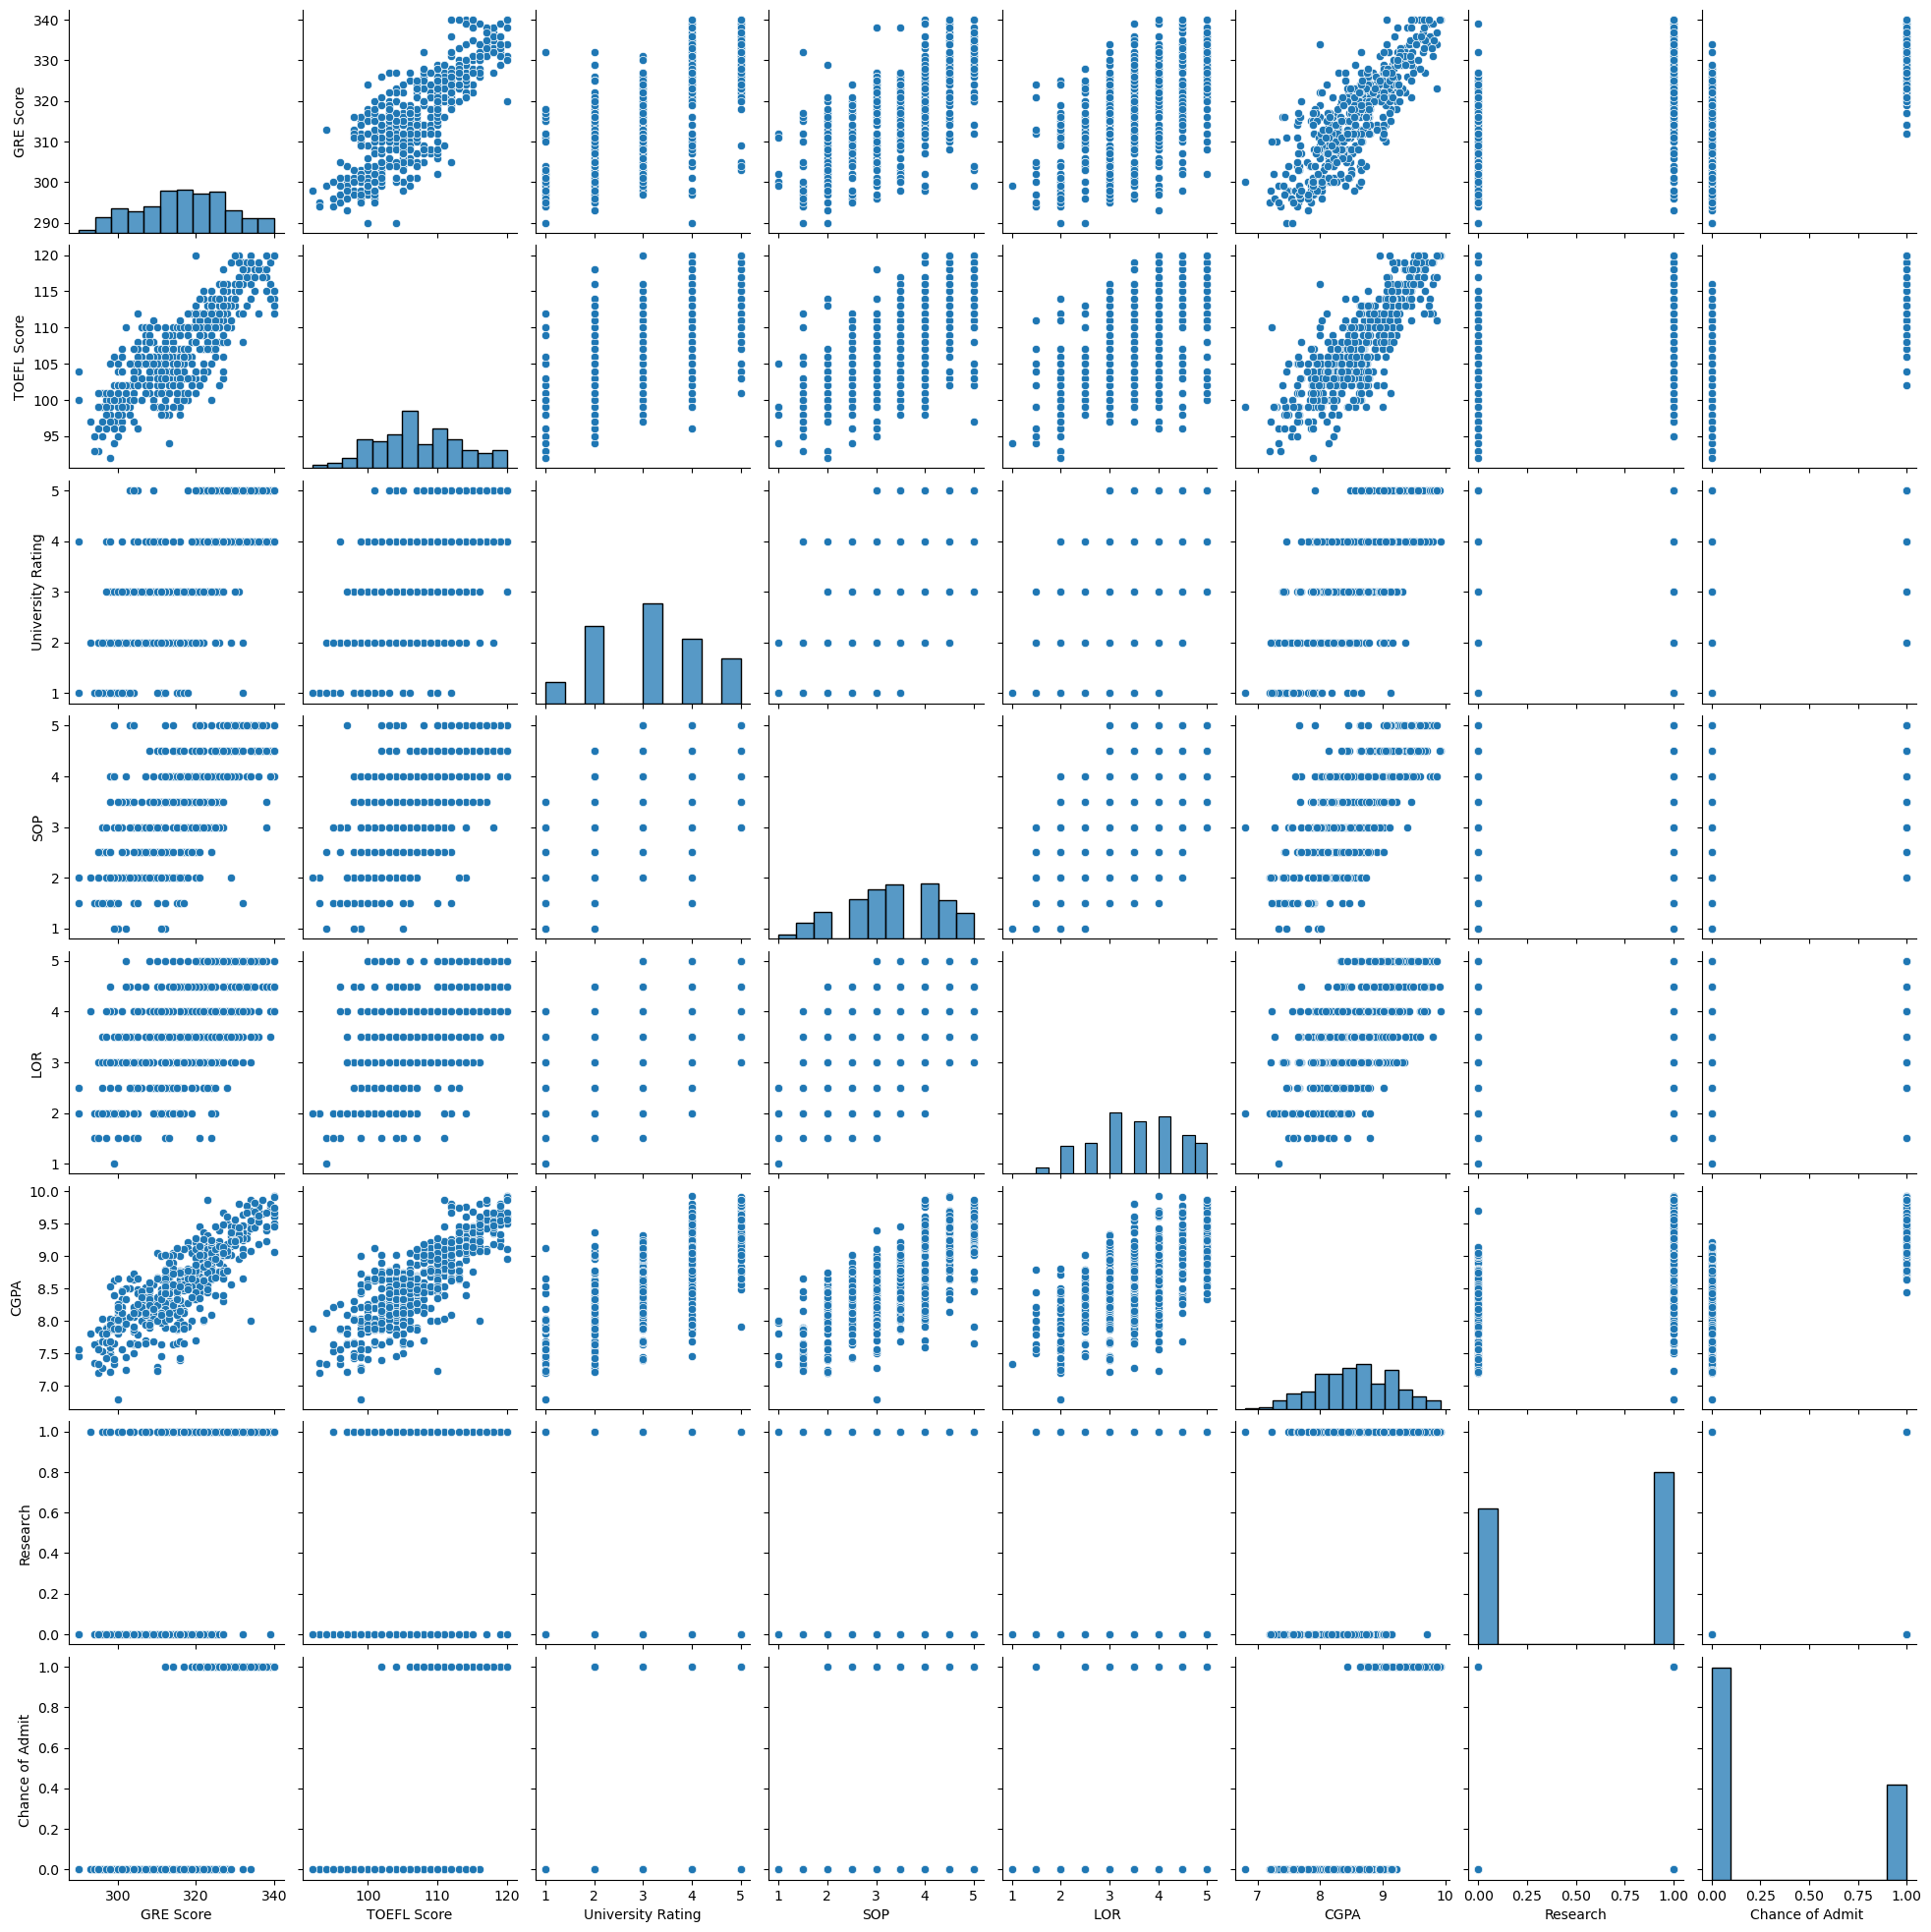

In [41]:
sns.pairplot(df)
plt.show()

### Model Building and Evaluation

In [42]:
x = df.iloc[:,:-1]

In [43]:
y = df.iloc[:,-1:]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [46]:
print("x_train shape :",x_train.shape)
print("x_test shape :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

x_train shape : (400, 7)
x_test shape : (100, 7)
y_train shape : (400, 1)
y_test shape : (100, 1)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
models={
    'LR':LogisticRegression(),
    'DTC':DecisionTreeClassifier(),
    'KNNC':KNeighborsClassifier(),
    'GNB':GaussianNB(),
    'RFC':RandomForestClassifier() 
}

<IPython.core.display.Javascript object>

In [69]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training score :{model.score(x_train,y_train)}')
    print(f'Test Score :{model.score(x_test,y_test)}')
    y_pred= model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(f'confusion metric:{confusion_matrix(y_test, y_pred)}')
    print(f'confusion metric:{accuracy_score(y_test, y_pred)}')
    print('======================================================')

Using model: LR
Training score :0.9125
Test Score :0.95
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.87      0.96      0.92        28

    accuracy                           0.95       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

confusion metric:[[68  4]
 [ 1 27]]
confusion metric:0.95
Using model: DTC
Training score :1.0
Test Score :0.89
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        72
           1       0.77      0.86      0.81        28

    accuracy                           0.89       100
   macro avg       0.86      0.88      0.87       100
weighted avg       0.90      0.89      0.89       100

confusion metric:[[65  7]
 [ 4 24]]
confusion metric:0.89
Using model: KNNC
Training score :0.91
Test Score :0.91
              precision    recall  f1-score   support

         

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bhush\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Training score :1.0
Test Score :0.94
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.89      0.89      0.89        28

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100

confusion metric:[[69  3]
 [ 3 25]]
confusion metric:0.94


In [50]:
model = LogisticRegression()
model = model.fit(x_train,y_train)

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
y_pred = model.predict(x_test)

In [52]:
y_pred[0]

1

In [53]:
y_test.values[0]

array([1], dtype=int64)